<a href="https://colab.research.google.com/github/SamThiagoMedeiros/DesafioFrexco/blob/main/DesafioFrexco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from pandas import read_excel

In [57]:
series = read_excel("dados.xlsx")

In [58]:
series.describe()

,Vendas
count,51.000000
mean,779.019608
std,435.009310
min,18.000000
25%,459.000000
50%,814.000000
75%,1095.500000
max,1692.000000


In [59]:
import matplotlib.pyplot as plt

In [60]:
series.head()

,Data,Vendas
0,2022-12-06,870.0
1,2022-12-07,868.0
2,2022-12-08,1189.0
3,2022-12-09,742.0
4,2022-12-10,317.0


In [61]:
split_point = len(series) - 5

In [62]:
dataset = series[0:split_point]

In [63]:
validation = series[split_point:]

In [64]:
print("Dataset %d, Validation %d" % (len(dataset), len(validation)))

Dataset 46, Validation 5


In [65]:
dataset.to_excel("dataset.xlsx")

In [66]:
validation.to_excel("validation.xlsx")

In [67]:
import pandas as pd
series = pd.read_excel("dataset.xlsx")

In [68]:
import prophet as fbprophet
import pandas as pd

In [69]:
dataframe = pd.DataFrame({"ds": dataset.Data, "y": dataset.Vendas})

In [70]:
from prophet.forecaster import Prophet
model = Prophet()

In [71]:
model.fit(dataframe)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpew0w94m6/4oev9klz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpew0w94m6/ckqdyrim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96165', 'data', 'file=/tmp/tmpew0w94m6/4oev9klz.json', 'init=/tmp/tmpew0w94m6/ckqdyrim.json', 'output', 'file=/tmp/tmpew0w94m6/prophet_model0q6sdl6i/prophet_model-20230203225448.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
futuro = model.make_future_dataframe(periods = 5, freq= "M")

In [73]:
futuro

,ds
0,2022-12-06
1,2022-12-07
2,2022-12-08
3,2022-12-09
4,2022-12-10
5,2022-12-11
6,2022-12-12
7,2022-12-13
8,2022-12-14
9,2022-12-15


In [74]:
saida = model.predict(futuro)

In [75]:
saida[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
44,2023-01-19,1230.725760,901.227080,1547.987034
45,2023-01-20,698.981194,349.470349,1007.594495
46,2023-01-31,978.107045,644.000286,1313.305723
47,2023-02-28,1081.355693,735.178140,1417.602716
48,2023-03-31,957.102814,631.880018,1266.065832
49,2023-04-30,786.632678,464.243685,1108.467308
50,2023-05-31,1429.089753,1113.977208,1774.853240


In [76]:
validation_df = pd.DataFrame({"ds": validation.Data})

In [77]:
validation_df["ds"]

46   2023-01-21
47   2023-01-22
48   2023-01-23
49   2023-01-24
50   2023-01-25
Name: ds, dtype: datetime64[ns]

In [78]:
saida = model.predict(validation_df)

In [79]:
saida[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-21,299.384754,4.038969,628.025275
1,2023-01-22,425.262410,105.601950,762.822376
2,2023-01-23,1266.380631,929.829028,1573.917892
3,2023-01-24,952.294883,630.791214,1276.720532
4,2023-01-25,964.470838,670.217036,1292.974909


In [80]:
validation

,Data,Vendas
46,2023-01-21,489.0
47,2023-01-22,584.0
48,2023-01-23,1603.0
49,2023-01-24,1094.0
50,2023-01-25,1210.0


In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.Vendas, saida.yhat))
print("Teste RMSE: %.3f" % rmse)

Teste RMSE: 225.756


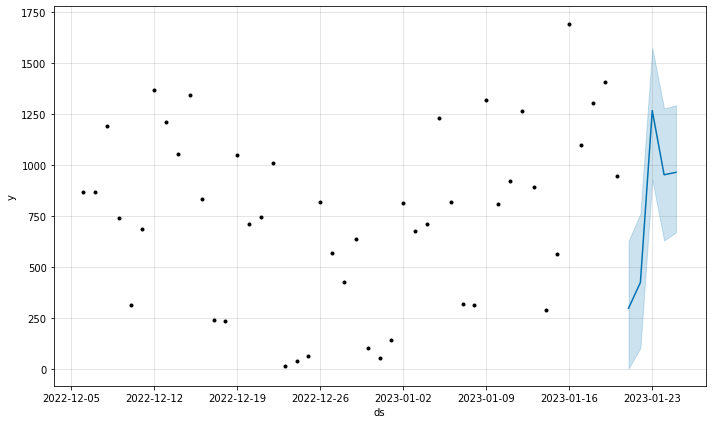

In [82]:
figura = model.plot(saida)

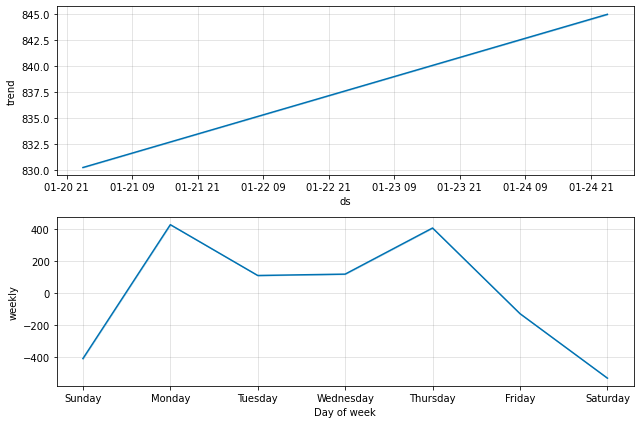

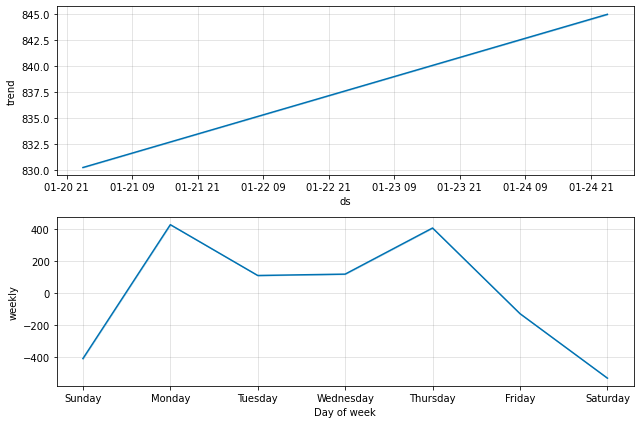

In [83]:
model.plot_components(saida)